In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


#### to understand the data types

In [3]:

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


#### to know if rank is ordinal categorical data

#### nulls

In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [5]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


#### encoding categorical data

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
oe=OrdinalEncoder()

In [8]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df        

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


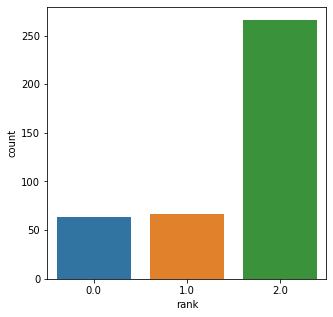

2.0    266
1.0     67
0.0     64
Name: rank, dtype: int64


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cat=df[['rank','discipline','sex']]
plt.figure(figsize=(5,5))
sns.countplot(df_cat['rank'])
plt.xlabel('rank')
plt.show()
print(df_cat['rank'].value_counts())

=
=
=


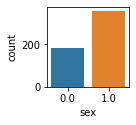

In [12]:
df_cat=df[['rank','discipline','sex']]
plt.figure(figsize=(5,5))
pltno=1
for x in df_cat.columns:
    if pltno<2:
        ax=plt.subplot(3,3,pltno)
        sns.countplot(df_cat[x],data=df_cat)
        plt.xlabel(x)
        print('=')
    pltno=+1
plt.show()   

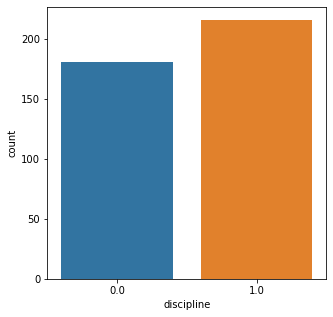

1.0    216
0.0    181
Name: discipline, dtype: int64


In [13]:
plt.figure(figsize=(5,5))
sns.countplot(df_cat['discipline'])
plt.xlabel('discipline')
plt.show()
print(df_cat['discipline'].value_counts())

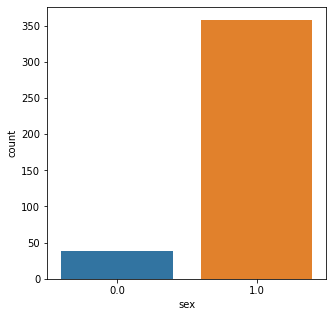

1.0    358
0.0     39
Name: sex, dtype: int64


In [14]:
plt.figure(figsize=(5,5))
sns.countplot(df_cat['sex'])
plt.xlabel('sex')
plt.show()
print(df_cat['sex'].value_counts())

#### continous data

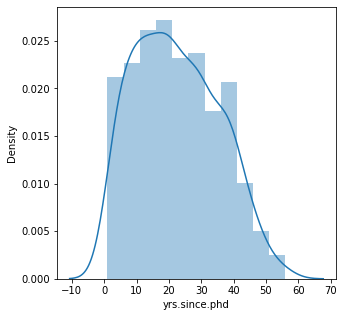

In [16]:
plt.figure(figsize=(5,5))
sns.distplot(df['yrs.since.phd'])
plt.xlabel('yrs.since.phd')
plt.show()

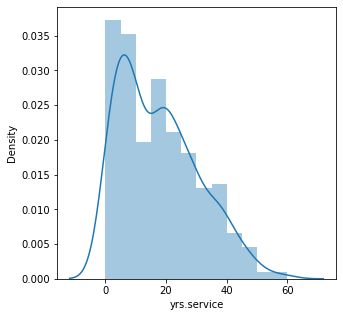

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df['yrs.service'])
plt.xlabel('yrs.service')
plt.show()

#### correlation


In [18]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

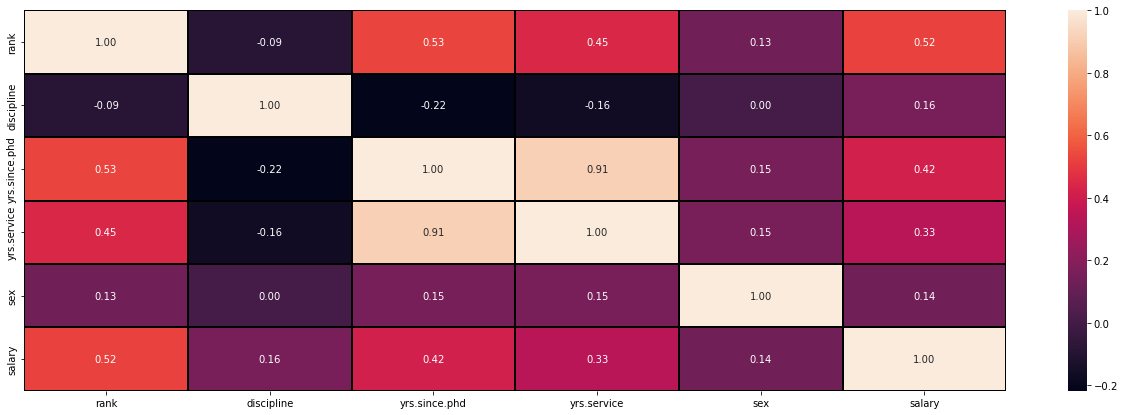

In [19]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [20]:
from sklearn.preprocessing import StandardScaler,power_transform
sc=StandardScaler()

In [21]:
X=df.drop('salary',axis=1)
X_sa=sc.fit_transform(X)
X_sa

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348,  0.3300584 ]])

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_sa, i)for i in range(len(X.columns))]
vif['features']=X.columns
vif

,vif,features
0,1.400669,rank
1,1.060144,discipline
2,6.646643,yrs.since.phd
3,5.897026,yrs.service
4,1.030558,sex


vif value not >10 for any features hence not multicolinearity problem

In [23]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

#### Outliers check

In [24]:
from scipy.stats import zscore

In [25]:
z=np.abs(zscore(df))
z.shape

(397, 6)

In [26]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [27]:
data_loss=((df.shape[0]-df_new.shape[0])/df.shape[0])*100
data_loss

10.831234256926953

In [28]:
X=df_new.drop('salary',axis=1)
Y=df_new['salary']
X=power_transform(X,method='yeo-johnson')
X=sc.fit_transform(X)
X

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

#### finding best random state

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [30]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    y_tr=lr.predict(x_train)
    y_te=lr.predict(x_test)
    if round(r2_score(y_train,y_tr)*100,1)==round(r2_score(y_test,y_te)*100,1):
        print(f" at random state {i} the model performs well")
        print(f"training accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
        print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
        print('\n \n')  

 at random state 323 the model performs well
training accuracy is 39.1
test accuracy is 39.1

 

 at random state 579 the model performs well
training accuracy is 38.6
test accuracy is 38.6

 

 at random state 852 the model performs well
training accuracy is 39.0
test accuracy is 39.0

 

